# HW8 due 5p Fri Mar 5 2020

This assignment will be graded on both participation and correctness (1 point each, for a total of 2 points for each sub-problem).

You are welcome (and encouraged) to:
* work together, synchronously and asynchronously, in study groups;
* use analytical and numerical computational tools -- specify the tool(s) in sourcecode and/or text;
* reuse example sourcecode and other materials provided in this course;
* consult textbooks, websites, and other publicly-available materials -- include full citation(s) with the URL and/or DOI.

Submit your homework writeup by uploading a .pdf and/or .ipynb on the Canvas Assignment.

You are welcome (and encouraged) to typeset your homework assignments rather than write them by hand.  While you could do this with LaTeX, you may find it easier to use the Colaboratory Notebook, since it is adept at embedding equations (via LaTeX syntax), matrix computations, and control system calculations.



# 0. [preferred name]; [preferred pronouns]

a. Approximately how many hours did you spend on this assignment?

***Answer:*** $\approx 1$ hour

b. Were there specific problems that took much longer than others?

***Answer:*** n/a

c. What class meeting(s) did you participate in this week?

***Answer:*** all :)

d. What timezone(s) were you working in this week?

***Answer:*** Seattle


# Kalman decomposition

Recall that the LTI-DE

$$ \dot{x}/x^+ = A x + B u,\ x\in\mathbb{R}^n,\ u\in\mathbb{R}^k, $$

$$ y = C x + D u,\ y\in\mathbb{R}^m, $$

has ***Kalman decomposition***

$$ H^{-1} A H = \left[\begin{array}{cccc} A_{co} & 0 & A_{\times o} & 0 \\ A_{c\times} & A_{c\bar{o}} & A_{\times\times} & A_{\times\bar{o}} \\ 0 & 0 & A_{\bar{c}o} & 0 \\ 0 & 0 & A_{\bar{c}\times} & A_{\bar{c}\bar{o}} \end{array}\right],\ 
H^{-1} B = \left[\begin{array}{c} B_{co} \\ B_{c\bar{o}} \\ 0 \\ 0 \end{array}\right],\ 
C H = \left[\begin{array}{cccc} C_{co} & 0 & C_{\bar{c}o} & 0 \end{array}\right]. $$

where

$$ H = \left[\begin{array}{cccc} V_{co} & V_{c\bar{o}} & V_{\bar{c}o} & V_{\bar{c}\bar{o}} \end{array} \right] $$

is an invertible matrix such that
1. the columns of $V_{co}$ and $V_{c\bar{o}}$ together form a basis for the controllable subspace $\mathcal{C}$,
3. the columns of $V_{c\bar{o}}$ and $V_{\bar{c}\bar{o}}$ together form a basis for the non-observable subspace $\mathcal{N}$,
2. the columns of $V_{c\bar{o}}$ form a basis for the controllable and non-observable subspace $\mathcal{C}\cap\mathcal{N}$,

the pair $\left(\left[\begin{array}{cc} A_{co} & 0 \\ A_{c\times} & A_{c\bar{o}} \end{array}\right],\left[\begin{array}{c} B_{co} \\ B_{c\bar{o}} \end{array}\right]\right)$ is controllable,

and the pair $\left(\left[\begin{array}{cc} A_{co} & A_{\times o}  \\ 0 & A_{\bar{c}o}\end{array}\right],\left[\begin{array}{cc} C_{co}  & C_{\bar{c}o} \end{array}\right]\right)$ is observable.

(a) Give an example of a physical system for which the controllable subspace $\mathcal{C}$, non-observable subspace $\mathcal{N}$, controllable and non-observable subspace $\mathcal{C}\cap\mathcal{N}$, and controllable-and-observable subspace (i.e. whatever's left over) are all non-trivial (i.e. not zero-dimensional).

***Solution:*** the simplest way to construct an example is to start with a controllable and observable system $(A, B, C)$ and then extend the system with three modified "copies":  
1. controllable and not-observable $(\bar{A}, \bar{B}, 0)$;
2. not-controllable and observable $(\bar{A}, 0, \bar{C})$;
3. not-controllable and not-observable $(\bar{A}, 0, 0)$.

If we prescribe no coupling between the 4 subsystems we obtain a system that is already in Kalman decomposition form (i.e. $H = I$):

$$ H^{-1} A H = \left[\begin{array}{cccc} \bar{A} & 0 & 0 & 0 \\ 0 & \bar{A} & 0 & 0 \\ 0 & 0 & \bar{A} & 0 \\ 0 & 0 & 0 & \bar{A} \end{array}\right],\ H^{-1} B = \left[\begin{array}{c} \bar{B} \\ \bar{B} \\ 0 \\ 0 \end{array}\right],\ C H = \left[\begin{array}{cccc} \bar{C} & 0 & \bar{C} & 0 \end{array}\right] $$





(b) Give the Kalman decomposition of an LTI-DE model for the physical system in (a).

***Solution:*** see solution to (a.).

(c) Use numerical simulations to verify the LTI-DE has the same input/output relationship as its controllable-and-observable subsystem.

***Solution:*** I'll choose a second-order system to begin with,

$$ m\ddot{q} + c\dot{q} + k q = u,\ q\in\mathbb{R},u\in\mathbb{R}, $$
$$ y = q,\ y\in\mathbb{R}. $$

In [14]:
def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(x,u) 

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

In [15]:
import numpy as np
import scipy as sp
import scipy.linalg as la

m,c,k = 1.,1.,1.
Abar = np.array([[0,1],[-k/m,-c/m]])
Bbar = np.array([[0],[1/m]])
Cbar = np.array([[1,0]])

A = la.block_diag(Abar,Abar,Abar,Abar)
B = np.vstack((Bbar,Bbar,0*Bbar,0*Bbar))
C = np.hstack((Cbar,0*Cbar,Cbar,0*Cbar))

In [13]:
def dx(t,x,u):
  return A @ x + B @ u

def y(x):
  return C @ x

def dxbar(t,xbar,u):
  return Abar @ xbar + Bbar @ u

def ybar(xbar):
  return Cbar @ xbar

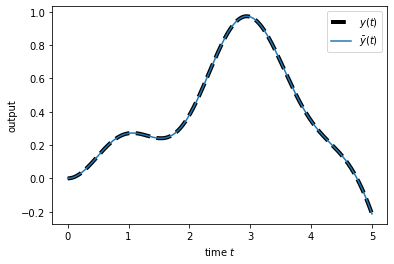

In [24]:
t = 5
u = lambda t : [np.sin(t) + np.sqrt(2)*np.cos(np.pi*t)]

x0 = 0*np.random.randn(8)
t_,x_ = numerical_simulation(dx,t,x0,ut=u)
y_ = np.array([y(x) for x in x_])

xbar0 = x0[:2]
t_,xbar_ = numerical_simulation(dxbar,t,xbar0,ut=u)
ybar_ = np.array([ybar(xbar) for xbar in xbar_])

import pylab as plt
plt.plot(t_,y_,'k--',lw=4,label=r'$y(t)$')
plt.plot(t_,ybar_,label=r'$\bar{y}(t)$')
plt.xlabel('time $t$')
plt.ylabel('output')
plt.legend()

array([ 0.17662573, -0.34498038, -1.51162196,  2.10279938, -0.23883542,
        1.66716624,  0.72517259, -0.04495064])

# controller and observer synthesis

Consider the LTI-DE model for wheeled vehicle steering (Example 7.4 in *Feedback Systems* by Astrom and Murray):

$$ \dot{x} = \left[\begin{array}{c} 0 & 1 \\ 0 & 0 \end{array}\right] x + \left[\begin{array}{c} \gamma \\ 1 \end{array}\right] u,\ y = \left[\begin{array}{cc} 1 & 0 \end{array}\right] x $$

where $\gamma > 0$ is a parameter that specifies the vehicle's wheelbase.

(a) Analytically apply the ***eigenvalue assignment*** procedure from problem 3 on homework 5 to synthesize a controller $u = - K x$ such that the closed-loop state dynamics $\dot{x} = (A - BK) x$ has eigenvalues $-\sigma\pm j\omega$ where $\sigma,\omega > 0$.

***Solution:*** the actual characteristic polynomial is $\det(s I - (A - BK)) = s^2 + (\gamma k_1 + k_2) s + k_1$, and the desired characteristic polynomial is $(s - (-\sigma + j\omega))(s - (-\sigma - j\omega)) = s^2 + 2\sigma s + \sigma^2 + \omega^2$.  Matching coefficients yields $k_1 = \sigma^2 + \omega^2$, $k_2 = 2\sigma - \gamma(\sigma^2 + \omega^2)$.



(b) Analytically apply the ***eigenvalue assignment*** procedure from problem 3 on homework 5 to synthesize an observer such that the closed-loop error dynamics $\dot{e} = (A - LC) e$ has characteristic polynomial $s^2 + 2\zeta s + \zeta^2$ where $\zeta > 0$.

***Solution:*** the actual characteristic polynomial is $\det(s I - (A - LC)) = s^2 + \ell_1 s + \ell_2$.  Matching coefficients with the desired characteristic polynomial yields $\ell_1 = 2\zeta$, $\ell_2 = \zeta^2$.



***In the remaining problems, you choose parameters $\gamma, \sigma, \omega, \zeta > 0$.***

(c) Numerically implement the state-feedback controller from (a).  Plot the state versus time from a nonzero initial condition, and overlay (i.e. plot on the same axis) the exponential envelope determined by the eigenvalues used to synthesized the controller.

***Solution:*** since $e^{(-\sigma\pm j\omega)t)} = e^{-\sigma t} e^{\pm j\omega t}$ and $e^{\pm j\omega t}$ has unit magnitude, the exponential envelope has time constant $-\sigma$.



In [51]:
g,s,w,z = 1,1,1,5 # gamma, sigma, omega, zeta

A = np.array([[0,1],[0,0]])
B = np.array([[g],[1]])
C = np.array([[1,0]])

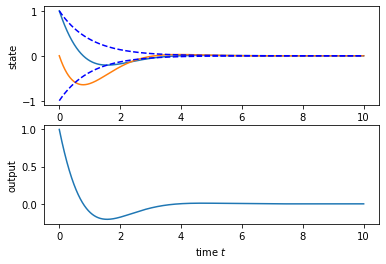

In [53]:
t = 10

k1 = s**2 + w**2
k2 = 2*s - g*k1
K = np.array([[k1,k2]])

dx = lambda t,x : (A - B @ K) @ x
y = lambda x : C @ x

x0 = [1,0]
t_,x_ = numerical_simulation(dx,t,x0)
y_ = np.array([y(x) for x in x_])

plt.subplot(2,1,1)
plt.plot(t_,x_)
plt.plot(t_,np.exp(-s*t_),'b--')
plt.plot(t_,-np.exp(-s*t_),'b--')
plt.ylabel('state')

plt.subplot(2,1,2)
plt.plot(t_,y_)
plt.ylabel('output')
plt.xlabel('time $t$');

(d) Numerically implement the observer from (b) -- ***note that the state of the simulated system should be 4-dimensional***.  Plot the state estimation error versus time from an initial condition with nonzero initial error, and overlay (i.e. plot on the same axis) the exponential envelope determined by the eigenvalues used to synthesized the observer.

***Solution:*** note that the desired characteristic polynomial has two roots at $-\zeta$, i.e. $s^2 + 2\zeta s + \zeta^2 = (s+\zeta)^2$, so the exponential envelope has time constant $-\zeta$.



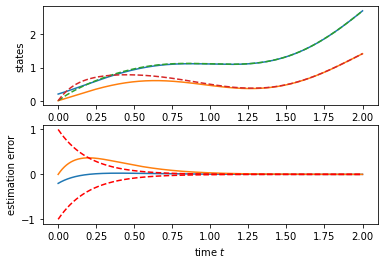

In [54]:
t = 2
u = lambda t : [np.sin(t) + np.sqrt(2)*np.cos(np.pi*t)]

l1 = 2*z
l2 = z**2
L = np.array([[l1],[l2]])

def dX(t,X,u):
  x,xhat = X[:2],X[2:]
  dx = A @ x + B @ u
  dxhat = A @ xhat + B @ u - L @ (y(xhat) - y(x))
  return np.hstack((dx,dxhat))

x0 = [.2,0]
xhat0 = [0,0]
X0 = np.hstack((x0,xhat0))
t_,X_ = numerical_simulation(dX,t,X0,ut=u)

x_ = X_[:,:2]
xhat_ = X_[:,2:]

plt.subplot(2,1,1)
plt.plot(t_,x_)
plt.plot(t_,xhat_,'--')
plt.ylabel('states')

plt.subplot(2,1,2)
plt.plot(t_,xhat_-x_)
plt.plot(t_,np.exp(-z*t_),'r--')
plt.plot(t_,-np.exp(-z*t_),'r--')
plt.ylabel('estimation error')
plt.xlabel('time $t$');

(e) Numerically implement the output-feedback controller obtained by combining the controller from (a) with the observer from (b) -- ***note that the state of the simulated system should be 4-dimensional***.  Plot the controlled system state versus time, and the state estimation error versus time, on separate axes.  Discuss how these results compare to the results in (c) and (d).

***Solution:*** 



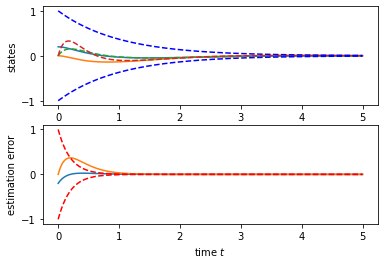

In [55]:
t = 5

def dX(t,X):
  x,xhat = X[:2],X[2:]
  u = - K @ xhat
  dx = A @ x + B @ u
  dxhat = A @ xhat + B @ u - L @ (y(xhat) - y(x))
  return np.hstack((dx,dxhat))

x0 = [.2,0]
xhat0 = [0,0]
X0 = np.hstack((x0,xhat0))
t_,X_ = numerical_simulation(dX,t,X0)

x_ = X_[:,:2]
xhat_ = X_[:,2:]

plt.subplot(2,1,1)
plt.plot(t_,x_)
plt.plot(t_,xhat_,'--')
plt.plot(t_,np.exp(-s*t_),'b--')
plt.plot(t_,-np.exp(-s*t_),'b--')
plt.ylabel('states')

plt.subplot(2,1,2)
plt.plot(t_,xhat_-x_)
plt.plot(t_,np.exp(-z*t_),'r--')
plt.plot(t_,-np.exp(-z*t_),'r--')
plt.ylabel('estimation error')
plt.xlabel('time $t$');

(f) Repeat the simulations in (e) several times with different parameter values (you do not need to provide the resulting plots).  Discuss how $\gamma, \sigma, \omega, \zeta > 0$ should be related to obtain desirable performance of the closed-loop system.

***Solution:*** since all the dynamics are linear, there aren't theoretical limits on how parameters relate to each other.  In practice, it's generally advisable to design the observer such that state estimation error converges to zero more rapidly than the state -- intuitively, the reason is that you want to obtain a good state estimate faster than you want to stabilize the estimated state; a good place to start is choosing the real part of the eigenvalues of $A - LC$ to be 2 to 5 times as negative as those of $A - BK$.